In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.datasets import load_digits

In [52]:
d=load_digits()

In [53]:
d.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [54]:
d.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [55]:
print(d.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [56]:
print(d.values)

<built-in method values of Bunch object at 0x000001AFE53F48E0>


In [57]:
print(d.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [58]:
x=d.data
y=d.target

In [59]:
x
y

array([0, 1, 2, ..., 8, 9, 8])

In [60]:
x
x.min()

0.0

In [61]:
y
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [62]:
print(x.shape)

(1797, 64)


In [63]:
#x[x>7]=x.max()
#x[x<=7]=x.min()
import cv2

In [64]:
ret,thres=cv2.threshold(x,0,16,cv2.THRESH_BINARY)

In [65]:
ret

0.0

In [66]:
thres.max()

16.0

In [67]:
thres=thres/16.0
thres.shape

(1797, 64)

In [20]:
img=thres[0:1]

[0]


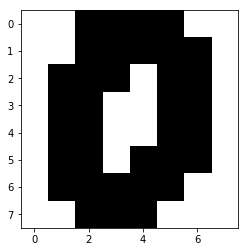

In [21]:
print(y[0:1])
plt.imshow(img.reshape((8,8)),cmap='binary')

In [22]:
from sklearn.cross_validation import train_test_split

C:\Users\Prince Tau\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
lr=LogisticRegression(C=10.0)
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC(C=10.0,probability=True)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)


In [26]:
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)
sv.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_lr=lr.predict(x_test)
y_kn=kn.predict(x_test)
y_sv=sv.predict(x_test)
y_dt=dt.predict(x_test)
y_rf=rf.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
cm_lr=confusion_matrix(y_test,y_lr)
cm_kn=confusion_matrix(y_test,y_kn)
cm_sv=confusion_matrix(y_test,y_sv)
cm_dt=confusion_matrix(y_test,y_dt)
cm_rf=confusion_matrix(y_test,y_rf)

cr_lr=classification_report(y_test,y_lr)
cr_kn=classification_report(y_test,y_kn)
cr_sv=classification_report(y_test,y_sv)
cr_dt=classification_report(y_test,y_dt)
cr_rf=classification_report(y_test,y_rf)

In [30]:
import seaborn as sb

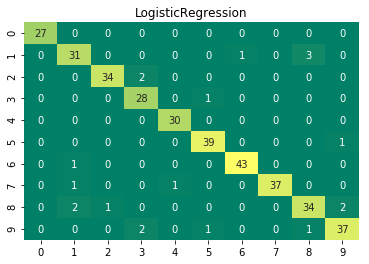

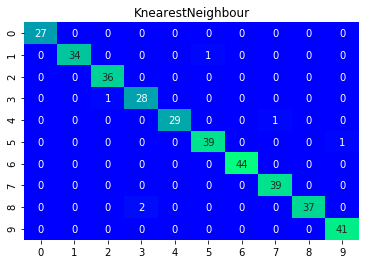

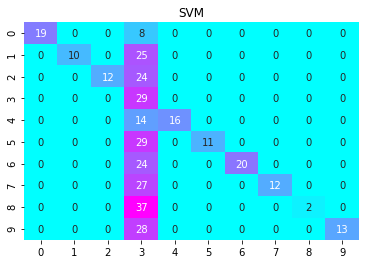

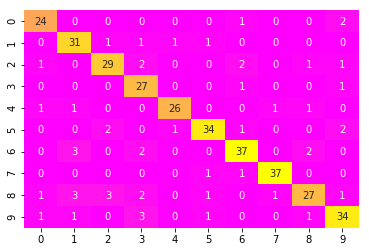

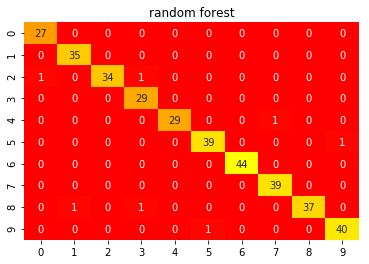

In [31]:
sb.heatmap(cm_lr,annot=True,cmap='summer',cbar=None)
plt.title('LogisticRegression')
plt.show()
sb.heatmap(cm_kn,annot=True,cmap='winter',cbar=None)
plt.title('KnearestNeighbour')
plt.show()
sb.heatmap(cm_sv,annot=True,cmap='cool',cbar=None)
plt.title('SVM')
plt.show()
sb.heatmap(cm_dt,annot=True,cmap='spring',cbar=None)
plt.show()
sb.heatmap(cm_rf,annot=True,cmap='autumn',cbar=None)
plt.title('random forest')
plt.show()

In [32]:
import cv2

In [33]:
im=cv2.imread('two.png',0)

In [34]:
im.max()

255

In [46]:
im.shape

(225, 225)

In [35]:
im.min()

0

In [36]:
ret,thres=cv2.threshold(im,0,255,cv2.THRESH_BINARY_INV)

In [37]:
ret

0.0

In [38]:
thres.shape

(225, 225)

In [39]:
im1=cv2.resize(thres,(8,8))

In [40]:
im1.shape

(8, 8)

In [41]:
test=im1.reshape((1,64))

In [47]:
test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
        255,   0,   0,   0,   0, 255,   0,   0, 255,   0,   0,   0,   0,
          0,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255,   0,   0,
          0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=uint8)

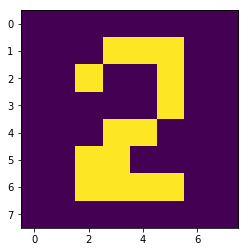

In [43]:
plt.imshow(im1)

In [44]:
print(lr.predict(test))

[2]
